## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization.In this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute.

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 20000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [70]:
#importing the libraries

import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize, MinMaxScaler, LabelEncoder, OneHotEncoder
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics, preprocessing
import string

In [71]:
# import the 20 news group dataset utilizing sklearn library

mydata_train = fetch_20newsgroups(subset = 'train')

mydata_test = fetch_20newsgroups(subset = 'test')

In [72]:
# print the news groups(target) in the dataset

pprint(list(mydata_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [69]:
# what is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils._bunch.Bunch'>
<class 'sklearn.utils._bunch.Bunch'>


In [5]:
# check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output:
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [73]:
# remove 5000 values since restricting it for running the whole thing 

text = mydata_train.data
test = mydata_test.data

## Preprocessing the Corpus

In [74]:
# preprocessing the data

lines = []
word_list = []

for line in text:
    # tokenize the text documents and update the lists word_list and lines
    
    # convert to lowercase
    line = line.lower()
    
    # remove punctuations
    line = line.translate(str.maketrans('', '', string.punctuation))
    
    # remove stopwords
    word_tokens = word_tokenize(line)
    stop_words = set(stopwords.words('english'))
    word_tokens_without_sw = [word for word in word_tokens if not word in stop_words]
    
    # concatenate word tokens without sw to form a sentence
    line = (" ").join(word_tokens_without_sw)
    
    lines.append(line)
    word_list.append(word_tokenize(line))

# flatten the list since word_list is a list of list
flatten_list = list(np.concatenate(word_list).flat)

# make sure the word_list contains unique tokens
word_list = list(set(flatten_list))

# calculate the total documents present in the corpus
total_docs = len(text)

# create a dictionary to keep track of index of each word
dict_idx = {val: idx + 1 for idx, val in enumerate(word_list)}

In [75]:
# create a frequency dictionary

def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {}
    
    for line in lines:
        for word in word_tokenize(line):
            if word in freq_word:
                freq_word[word] = freq_word.get(word) + 1
            else:
                freq_word[word] = 1

    return freq_word

In [76]:
# create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'lerxstwamumdedu': 2,
 'wheres': 23,
 'thing': 1519,
 'subject': 12253,
 'car': 1255,
 'nntppostinghost': 4781,
 'rac3wamumdedu': 7,
 'organization': 11185,
 'university': 5544,
 'maryland': 124,
 'college': 620,
 'park': 214,
 'lines': 11824,
 '15': 1241,
 'wondering': 303,
 'anyone': 2428,
 'could': 3495,
 'enlighten': 27,
 'saw': 548,
 'day': 1321,
 '2door': 7,
 'sports': 159,
 'looked': 342,
 'late': 287,
 '60s': 49,
 'early': 464,
 '70s': 56,
 'called': 1065,
 'bricklin': 4,
 'doors': 82,
 'really': 2174,
 'small': 780,
 'addition': 289,
 'front': 453,
 'bumper': 33,
 'separate': 217,
 'rest': 482,
 'body': 509,
 'know': 5116,
 'tellme': 2,
 'model': 442,
 'name': 1238,
 'engine': 364,
 'specs': 130,
 'years': 1984,
 'production': 126,
 'made': 1578,
 'history': 606,
 'whatever': 470,
 'info': 917,
 'funky': 7,
 'looking': 999,
 'please': 2143,
 'email': 1982,
 'thanks': 1841,
 'il': 143,
 'brought': 297,
 'neighborhood': 36,
 'lerxst': 2,
 'guykuocarsonuwashingtonedu': 9,
 'guy'

In [77]:
# create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    
    # number of times term t appears in a document d
    t = 0
    
    # total numbers of terms in document d
    f = len(document)
    
    for w in document:
        # if word equals to given term (word), increment the count
        if w == word:
            t += 1
    
    tf = t / f

    return tf

In [78]:
# create a function to calculate the Inverse Document Frequency

def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    
    # number of documents with term t in it
    freq = freq_word.get(word)
    
    idf = math.log(total_docs / freq)

    return idf

In [79]:
# create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above 
# to get TF-IDF

def tfidf(sentence, dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = np.zeros(len(dict_idx) + 1)

    for word in sentence:
        tf = term_frequency(sentence, word)
        idf = inverse_df(word)
        
        tf_idf_vec[dict_idx[word]] = tf * idf

    return tf_idf_vec

In [13]:
# compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

vectors = []

for line in lines:
    tf_idf_vec = tfidf(word_tokenize(line), dict_idx)
    vectors.append(tf_idf_vec)

## Multinomial Naive Bayes (10 Points)

In [14]:
# fit a Multinomial Naive Bayes Model on our dataset

# normalize features to [0,1] range to avoid negative values since Multinomial NB doesn't allow it
normalized_vectors = MinMaxScaler().fit_transform(vectors)

# alhpa : additive smoothing parameter
model = MultinomialNB(alpha=.01)

# fit naive bayes classifier according to X, y
model.fit(normalized_vectors, mydata_train.target)

MultinomialNB(alpha=0.01)

In [15]:
# perform testing on the train dataset

pred = model.predict(normalized_vectors)

In [16]:
# calculate the F1 Score and the Accuracy

F1_score = metrics.f1_score(mydata_train.target, pred, average='macro')
Accuracy = metrics.accuracy_score(mydata_train.target, pred)

print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.9987226738038085
Accuracy:  0.9986742089446703


### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly.
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [17]:
# install libraries
# !pip install wikipedia

In [80]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science",
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund",
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with.
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected categories

# technology
category_1 = ["Natural language processing", "Machine learning", "Quantum machine learning", 
           "Artificial intelligence", "Data science", "Master in Data Science"]
# finance
category_2 = ["Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology", 
              "International Monetary Fund"]
# sports
category_3 = ["Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]
# geography
category_4 = ["Mountains", "Regions", "Rivers", "Territories", "Villages", "Cities"]

# selected topics
topics = category_1 + category_2 + category_3 + category_4

# list of articles to be downloaded
articles = {}

for topic in topics:
    if topic in category_1:
        label = "technology"
    elif topic in category_2:
        label = "finance"
    elif topic in category_3:
        label = "sports"
    elif topic in category_4:
        label = "geography"
        
    result = wikipedia.search(topic, results = 4)
    
    for a in result:
        articles[a] = label

# download and store articles (summaries) in this variable
data = []
category = []

for a, l in articles.items():
    try:
        data.append(wikipedia.summary(a))
        category.append(l)
    except WikipediaException:
        continue

In [81]:
articles

{'Natural language processing': 'technology',
 'Natural language': 'technology',
 'Outline of natural language processing': 'technology',
 'Natural Language Toolkit': 'technology',
 'Machine learning': 'technology',
 'Quantum machine learning': 'technology',
 'Adversarial machine learning': 'technology',
 'Attention (machine learning)': 'technology',
 'Machine learning in physics': 'technology',
 'Leakage (machine learning)': 'technology',
 'Artificial intelligence': 'technology',
 'Generative artificial intelligence': 'technology',
 'Artificial general intelligence': 'technology',
 'A.I. Artificial Intelligence': 'technology',
 'Data science': 'technology',
 'Data': 'technology',
 'Data (computer science)': 'technology',
 'Data analysis': 'technology',
 'Master in Data Science': 'technology',
 "List of master's degrees": 'technology',
 'Master of Science in Information Technology': 'technology',
 'Master of Library and Information Science': 'technology',
 'Bank of America': 'finance',

### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** I choose to clean the data because having clean data is going to increase overall productivity and allow the model for the highest quality in decision-making by minimizing the noise from the corpus such as stopwords, punctuations, etc. Additionally, it ensures the data quality and validity when grouping similar objects based on their features.
It also reduces the dimensions of the data. 

In [82]:
# you can use Assignment 1's clean message function
import re
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')

def clean_message(message):
    
    # convert to lowercase
    message = message.lower()
    
    # remove links i.e. new line tags
    message = re.sub("\n", " ", message)
    
    # remove punctuations
    message = message.translate(str.maketrans('', '', string.punctuation))
    
    # remove stopwords
    word_tokens = word_tokenize(message)
    stop_words = set(stopwords.words('english'))
    word_tokens_without_sw = [word for word in word_tokens if not word in stop_words]
    
    # concatenate word tokens without sw to form a sentence
    filtered_words = (" ").join(word_tokens_without_sw)
    
    # stemming operation
    word_tokens = word_tokenize(filtered_words)
    lemmatizer = WordNetLemmatizer()
    singles = [lemmatizer.lemmatize(word) for word in word_tokens]
    
    # concatenate word tokens back to form a sentence
    message = (" ").join(singles)
    
    return message

In [83]:
# list to store clean summaries
clean_data = []

# clean up the wikipedia data
for summary in data:
    clean_data.append(clean_message(summary))

In [84]:
len(clean_data)

75

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [85]:
# initiliaze the vectorizer
vectorizer = TfidfVectorizer()

# transform the data
X = vectorizer.fit_transform(clean_data)

In [86]:
print(X.shape)

(75, 3482)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [87]:
# call TSNE() to fit the data
X_embedded = TSNE(n_components=2, init='random').fit_transform(X)

In [88]:
len(X_embedded)

75

Plot and annotate the points with different markers for different expected groups.

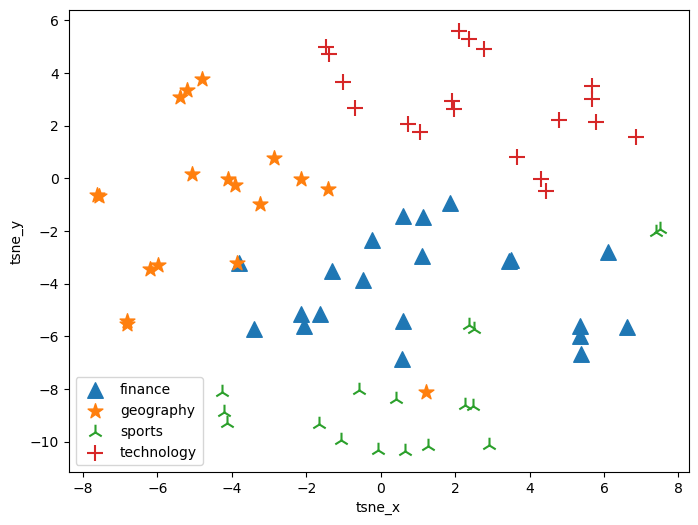

In [90]:
# initialize data frame and columns
df = pd.DataFrame()
df['tsne_x'] = X_embedded[:,0]
df['tsne_y'] = X_embedded[:,1]

# assign label to each record
groups = df.assign(category=category).groupby('category')

# get a figure handle
fig, ax = plt.subplots(figsize=(8,6))

# dict of markers with categories as keys
markers = {"finance": "^", "geography": "*", "sports": "2", "technology": "+"}

for name, points in groups:
    ax.scatter(points.tsne_x, points.tsne_y, label=name, marker=markers[name], s=125)

ax.legend()
ax.set_xlabel("tsne_x")
ax.set_ylabel("tsne_y")
plt.show()

**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):** It can be inferred from the plot that articles of related topics are relatively clustered together, and hence the categorization done by T-SNE does a decent job. There is the case however of geography articles being clustered around finance articles. Based on the topics chosen in each category and the articles acquired, it could be due to the geographical information contained in the articles from the finance category, such as Bank of America, Visa, etc. which causes them to be intermixed. 

# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc..,

### We are providing train.txt and val.txt files along with this notebook.

### Library Imports and Utility functions

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # from the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [4]:
# import the train.txt and val.txt file into pandas dataframe format

# train
df_train = pd.DataFrame()
df_train = pd.read_csv("train.txt", sep = ';', header = None)
df_train.columns = ['Sentence', 'Emotion']

# validation
df_val = pd.DataFrame()
df_val = pd.read_csv("val.txt", sep = ';', header = None)
df_val.columns = ['Sentence', 'Emotion']

# and printout the train.shape and validation.shape
print(df_train.shape)
print(df_val.shape)

# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

(16000, 2)
(2000, 2)


In [5]:
# clean the text in the train and validation dataframes using the clean_text function provided above
for i in range(len(df_train)):
    df_train['Sentence'].iloc[i] = clean_text(df_train['Sentence'].iloc[i])

for i in range(len(df_val)):
    df_val['Sentence'].iloc[i] = clean_text(df_val['Sentence'].iloc[i])

In [7]:
# initialise count vectorizer from sklearn module with default parameter
countVec = CountVectorizer()

# fit on train dataset and transform both train and validation dataset

# countVectorizer transform returns a sparse matrix and tensorflow model accepts a tensorflow tensor or a list/array,
# so it's required to convert the shape to an array/list

X_train_countVec = countVec.fit_transform(df_train['Sentence']).toarray()
X_val_countVec = countVec.transform(df_val['Sentence']).toarray()

In [8]:
print(X_train_countVec.shape)
print(X_val_countVec.shape)

(16000, 13457)
(2000, 13457)


In [9]:
# initialise tfidf vectorizer from sklearn module with default parameter
tfidfVec = TfidfVectorizer()

# fit on train dataset and transform both train and validation dataset

# tfidfVectorizer transform returns a sparse matrix and tensorflow model accepts a tensorflow tensor or a list/array,
# so it's required to convert the shape to an array/list

X_train_tfidf = tfidfVec.fit_transform(df_train['Sentence']).toarray()
X_val_tfidf = tfidfVec.transform(df_val['Sentence']).toarray()

In [10]:
print(X_train_tfidf.shape)
print(X_val_tfidf.shape)

(16000, 13457)
(2000, 13457)


In [11]:
# initialise label encoder from sklearn module
le = LabelEncoder()

# fit on train labels and transform both train and validation labels

le_train = le.fit_transform(df_train['Emotion'].values)
le_val = le.transform(df_val['Emotion'].values)

In [12]:
print(le_train.shape)
print(le_val.shape)

(16000,)
(2000,)


In [13]:
# convert the labels into one hot encoding form
encoder = OneHotEncoder(handle_unknown='ignore')

# fit and transform train and validation labels

# OneHotEncoder transform returns a sparse matrix and tensorflow model accepts a tensorflow tensor or a list/array,
# so it's required to convert the shape to an array/list

encoded_train = encoder.fit_transform(le_train.reshape(-1,1)).toarray()
encoded_val = encoder.fit_transform(le_val.reshape(-1,1)).toarray()

In [14]:
print(encoded_train.shape)
print(encoded_val.shape)

(16000, 6)
(2000, 6)


### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (20 points)

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

  # layer 1 : input layer
    inp = tf.keras.Input((X.shape[1],))

  # layer 2 : add the dense layer with 2048 units and relu activation
    x = tf.keras.layers.Dense(2048, input_dim = X.shape[1], activation = 'relu')(inp)

  # layer 3 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(0.5)(x)

  # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization
    x = tf.keras.layers.Dense(1024, activation = 'tanh', kernel_regularizer='l2')(x)

  # layer 5 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(0.5)(x)

  # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
    x = tf.keras.layers.Dense(512, activation = 'tanh', kernel_regularizer='l2')(x)

  # layer 7 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(0.5)(x)

  # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
    x = tf.keras.layers.Dense(256, activation = 'tanh', kernel_regularizer='l2')(x)

  # layer 9 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(0.5)(x)

  # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
    x = tf.keras.layers.Dense(128, activation = 'tanh', kernel_regularizer='l2')(x)

  # layer 11 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(0.5)(x)

  # layer 12 : output layer with units equal to number of classes and activation as softmax
    x = tf.keras.layers.Dense(6, activation = 'softmax')(x)

  # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy
    model = tf.keras.models.Model(inputs = inp, outputs = x)
    
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    
    model.compile(loss = 'CategoricalCrossentropy', optimizer = opt, metrics = ['AUC', 'Precision', 'Recall', 'Accuracy'])
    
    return model

In [16]:
# call the build_model function and initialize the model
model = build_model(X_train_countVec)

In [17]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs,
# adjust batch size according to your computation power (suggestion use : 8)

history = model.fit(X_train_countVec, encoded_train, epochs = 10, batch_size = 10, 
                    validation_data=(X_val_countVec, encoded_val))

Epoch 1/10
1600/1600 [==============================] - 224s 139ms/step - loss: 2.4458 - auc: 0.8014 - precision: 0.5752 - recall: 0.1482 - Accuracy: 0.4126 - val_loss: 1.3122 - val_auc: 0.8723 - val_precision: 0.6785 - val_recall: 0.3430 - val_Accuracy: 0.5185
Epoch 2/10
1600/1600 [==============================] - 224s 140ms/step - loss: 1.2444 - auc: 0.8919 - precision: 0.7214 - recall: 0.4545 - Accuracy: 0.6194 - val_loss: 1.2064 - val_auc: 0.9012 - val_precision: 0.7332 - val_recall: 0.5620 - val_Accuracy: 0.6735
Epoch 3/10
1600/1600 [==============================] - 218s 136ms/step - loss: 1.1489 - auc: 0.9141 - precision: 0.7461 - recall: 0.5764 - Accuracy: 0.6809 - val_loss: 1.2002 - val_auc: 0.9083 - val_precision: 0.7634 - val_recall: 0.6195 - val_Accuracy: 0.6940
Epoch 4/10
1600/1600 [==============================] - 219s 137ms/step - loss: 1.0972 - auc: 0.9240 - precision: 0.7612 - recall: 0.6202 - Accuracy: 0.7066 - val_loss: 1.1552 - val_auc: 0.9144 - val_precision: 0.7

In [19]:
print(history.history.keys())

dict_keys(['loss', 'auc', 'precision', 'recall', 'Accuracy', 'val_loss', 'val_auc', 'val_precision', 'val_recall', 'val_Accuracy'])


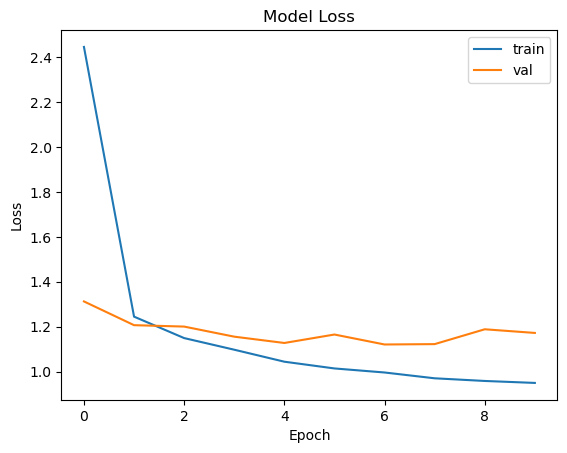

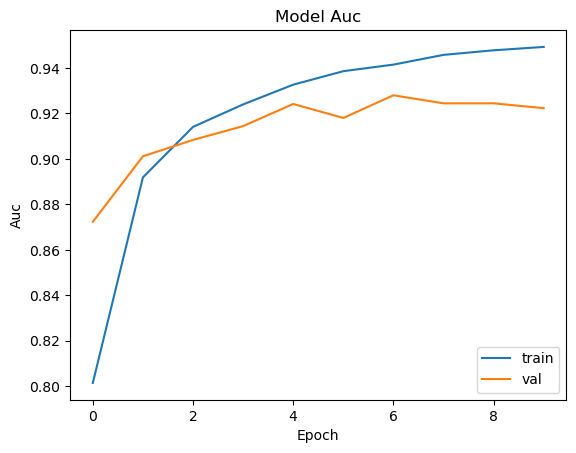

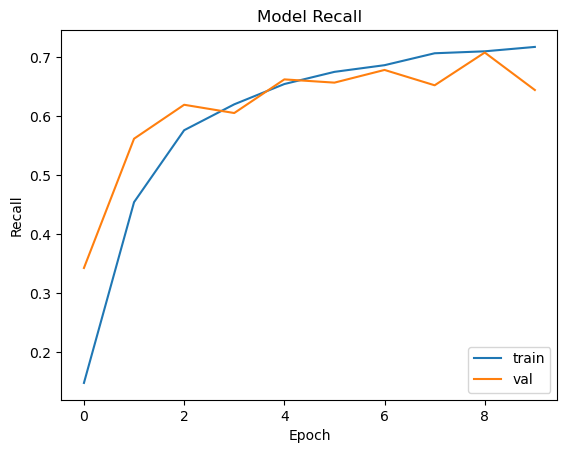

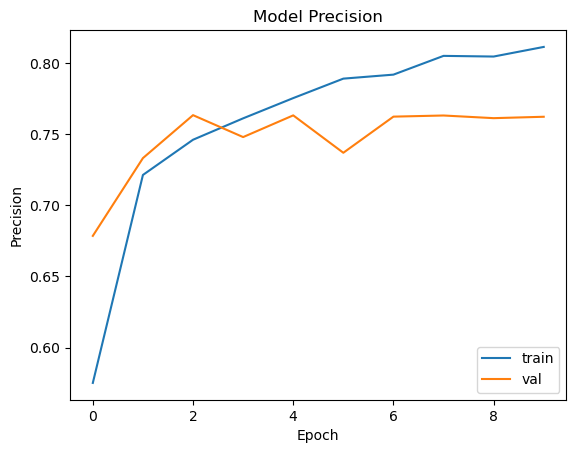

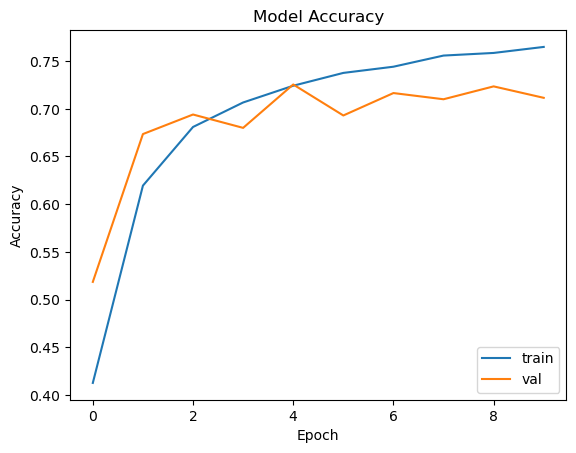

In [23]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision 
# and train accuracy vs val accuracy and comment your observations

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# summarize history for auc
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model Auc')
plt.ylabel('Auc')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for accuracy
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

### comment on plot observations
Loss is showing a dimenshing effect over the increasing epochs cycles, whereas, precision and recall are increasing over time, and therefore, AUC is also showing an increasing effect. Thus, for model to have a higher prediction chance we need to have a higher accuracy which is what our model shows over time. 

In [24]:
# again call the build_model function and initialize the model
model = build_model(X_train_tfidf)

In [25]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs,
# adjust batch size according to your computation power (suggestion use : 8)

history_tfidf = model.fit(X_train_tfidf, encoded_train, epochs = 10, batch_size = 10, 
                    validation_data=(X_val_tfidf, encoded_val))

Epoch 1/10
1600/1600 [==============================] - 224s 139ms/step - loss: 1.9929 - auc: 0.7977 - precision: 0.5916 - recall: 0.1244 - Accuracy: 0.3989 - val_loss: 1.2884 - val_auc: 0.8743 - val_precision: 0.6382 - val_recall: 0.3405 - val_Accuracy: 0.4975
Epoch 2/10
1600/1600 [==============================] - 227s 142ms/step - loss: 1.2051 - auc: 0.8948 - precision: 0.7263 - recall: 0.4406 - Accuracy: 0.6068 - val_loss: 1.1500 - val_auc: 0.9077 - val_precision: 0.7409 - val_recall: 0.5405 - val_Accuracy: 0.6590
Epoch 3/10
1600/1600 [==============================] - 230s 144ms/step - loss: 1.1000 - auc: 0.9184 - precision: 0.7483 - recall: 0.5692 - Accuracy: 0.6759 - val_loss: 1.1254 - val_auc: 0.9157 - val_precision: 0.7543 - val_recall: 0.5755 - val_Accuracy: 0.6890
Epoch 4/10
1600/1600 [==============================] - 233s 146ms/step - loss: 1.0386 - auc: 0.9310 - precision: 0.7669 - recall: 0.6279 - Accuracy: 0.7107 - val_loss: 1.1060 - val_auc: 0.9180 - val_precision: 0.7

In [26]:
print(history_tfidf.history.keys())

dict_keys(['loss', 'auc', 'precision', 'recall', 'Accuracy', 'val_loss', 'val_auc', 'val_precision', 'val_recall', 'val_Accuracy'])


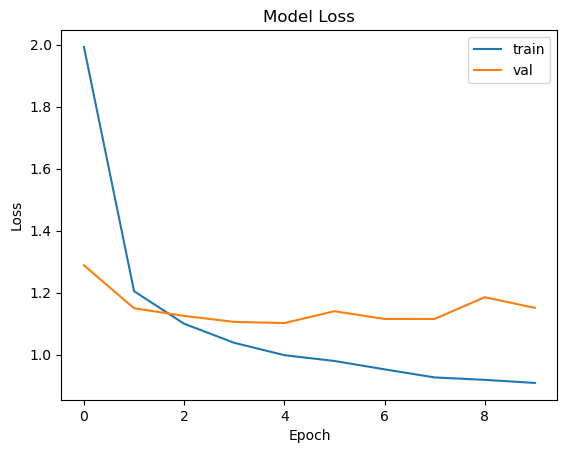

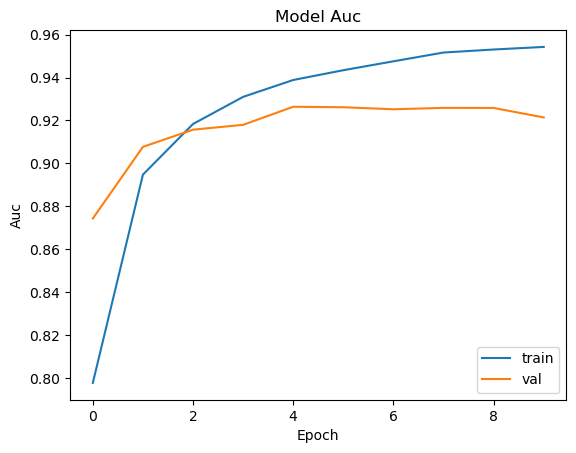

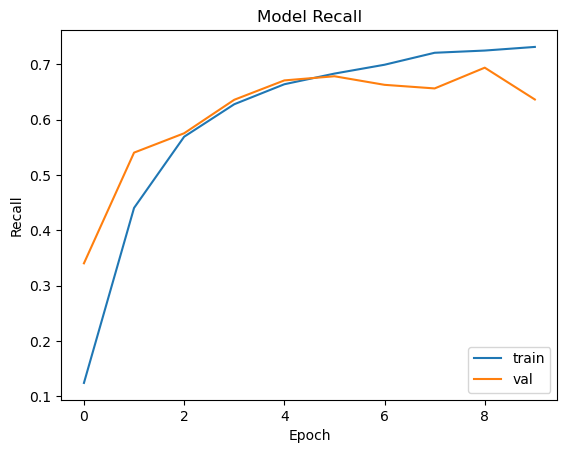

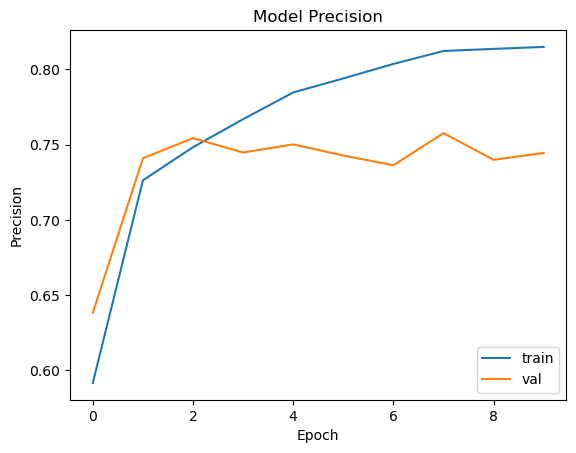

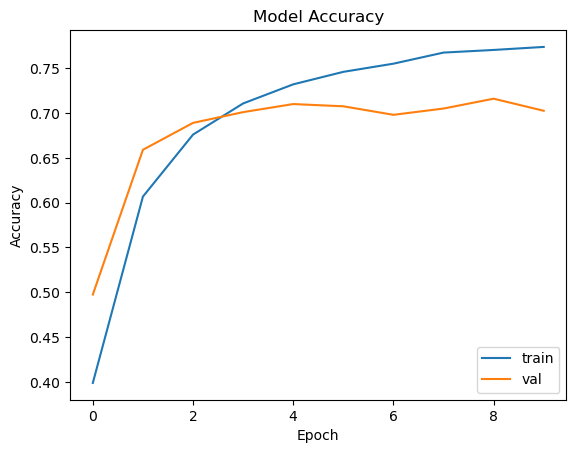

In [27]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision 
# and train accuracy vs val accuracy and comment your observations

# summarize history for loss
plt.plot(history_tfidf.history['loss'])
plt.plot(history_tfidf.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# summarize history for auc
plt.plot(history_tfidf.history['auc'])
plt.plot(history_tfidf.history['val_auc'])
plt.title('Model Auc')
plt.ylabel('Auc')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for recall
plt.plot(history_tfidf.history['recall'])
plt.plot(history_tfidf.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for precision
plt.plot(history_tfidf.history['precision'])
plt.plot(history_tfidf.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for accuracy
plt.plot(history_tfidf.history['Accuracy'])
plt.plot(history_tfidf.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

### comment on plot observations
Loss is showing a dimenshing effect over the increasing epochs cycles, whereas, precision and recall are increasing over time, and therefore, AUC is also showing an increasing effect. Thus, for model to have a higher prediction chance we need to have a higher accuracy which is what our model shows over time. This model tends to have slightly higher AUC than the count vectorizer which contributes to better performance for the model. 

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

**CountVectorizer:** is a text feature extraction method that transforms the given text into a vector on the basis of the frequency of each word that occurs in the entire text. It creates a matrix in which unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value in each cell denotes the frequency of the given word in the given text sample. 

**TFIDF:** stands for Term Frequency-Inverse Document Frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. TFIDF value increases proportionally to the number of times a word appears in a document but is offset by the frequency of the word in the corpus. Term Frequency (TF) represents how frequently a term t, appears in a document, d i.e. TF(t,d) = Number of times t appears in the document d / Total numbers of terms in the document d. And Inverse Document-Frequency(IDF) represents how important a term is. When computing TF-IDF, terms that are very frequent across many documents have a lower IDF. In other words, if a term is common and appears in many documents, its IDF value drops, i.e. IDF(t,d) = log(Total number of documents in the corpus D / Number of documents with term t). Hence, overall score tdidf(t,d,D) = TF * IDF. Thus, this technique helps in capturing the importance of words in context. 

**Word2Vec:** is an algorithm that uses neural network model to learn word associations from a large corpus of text. Once trained, such models can detect semantic relationships between words. It represents words as dense, continuous-valued vectors in a high-dimensional space. The main goal of Word2Vec revolves around predicting the context words based on a center word or vice-versa in a fixed size window. 

**Glove:** stands for Global Vectors for Word Representation, is an alternate method to create word embeddings. It is an unsupervised learning algorithm for obtaining vector representations of words. Training is performed on aggregated global word-word co-occurrences statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space. It aims to learn word vectors such that the dot product of the vector approximates the logarithmic of the words co-occurences proabilities. 

In a nutshell, all these are techniques to capture text representation and feature extraction, however, each one of them have different approaches to capture the information given in a corpus. 

What is the significant difference between the Naive Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**

The significant difference between the Naive Bayes implementation using Bag of Words and TF-IDF lies in how they represent and weigh words in the corpus. Bag of words just creates a set of vectors containing the frequency of word occurrences in the document, while the TF-IDF model contains information on word frequency and word importance in the context of the entire corpus. 